In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [21]:
data = pd.read_csv("Housing.csv")
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [22]:
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [23]:
missing = data.isnull().sum()
print(missing[missing > 0])


Series([], dtype: int64)


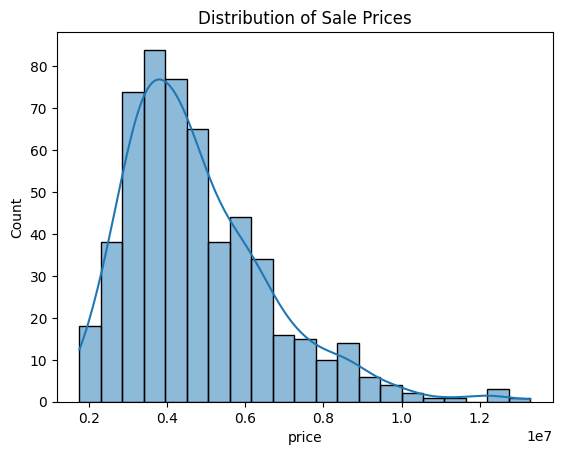

In [24]:
sns.histplot(data['price'], kde=True)
plt.title('Distribution of Sale Prices')
plt.show()

In [28]:
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

In [29]:
data = pd.get_dummies(data, drop_first=True)

In [32]:
X = data.drop('price', axis=1)
y = data['price']

In [34]:
corr_matrix = data.corr()
top_features = corr_matrix['price'].sort_values(ascending=False).head(10)
print(top_features)


price                  1.000000
area                   0.535997
bathrooms              0.517545
airconditioning_yes    0.452954
stories                0.420712
parking                0.384394
bedrooms               0.366494
prefarea_yes           0.329777
mainroad_yes           0.296898
guestroom_yes          0.255517
Name: price, dtype: float64


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: 260032.35760741495
Coefficients: [ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
  2.24841913e+05  3.67919948e+05  2.31610037e+05  3.90251176e+05
  6.84649885e+05  7.91426736e+05  6.29890565e+05 -1.26881818e+05
 -4.13645062e+05]


In [38]:
y_pred = model.predict(X_test)

In [39]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 1754318687330.6643
Root Mean Squared Error: 1324506.9600914388


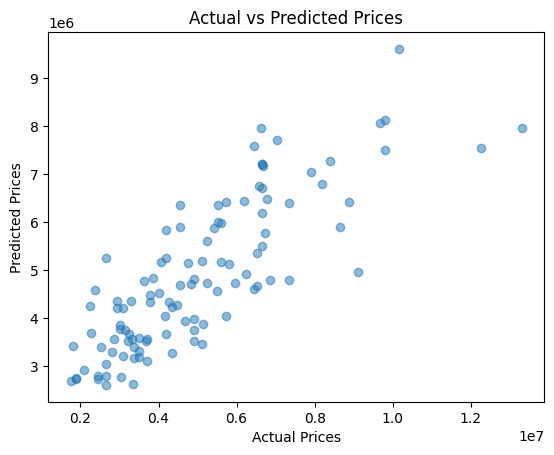

In [40]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [41]:
import joblib
joblib.dump(model, "housing_price_model.pkl")

['housing_price_model.pkl']